<a href="https://colab.research.google.com/github/23dhruvs/cardio_disease_detection/blob/main/Dhruv_DA_IBM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/cardio_train.csv', sep=';')
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


**About Dataset**

Link: https://www.kaggle.com/datasets/sulianova/cardiovascular-disease-dataset/data

Data description

There are 3 types of input features:

Objective: factual information;

Examination: results of medical examination;

Subjective: information given by the patient.

Features:

Age | Objective Feature | age | int (days)

Height | Objective Feature | height | int (cm) |

Weight | Objective Feature | weight | float (kg) |

Gender | Objective Feature | gender | categorical code |

Systolic blood pressure | Examination Feature | ap_hi | int |

Diastolic blood pressure | Examination Feature | ap_lo | int |

Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal,
3: well above normal |

Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well
above normal |

Smoking | Subjective Feature | smoke | binary |

Alcohol intake | Subjective Feature | alco | binary |


Physical activity | Subjective Feature | active | binary |

Presence or absence of cardiovascular disease | Target Variable | cardio |
binary |

All of the dataset values were collected at the moment of medical examination.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


Total 70000 rows in 13 columns. No null values in dataset.

In [ ]:
df.nunique()

id             70000
age             8076
gender             2
height           109
weight           287
ap_hi            153
ap_lo            157
cholesterol        3
gluc               3
smoke              2
alco               2
active             2
cardio             2
dtype: int64

id : unique for each data, we don't need that

age : in days, need to convert in years

In [ ]:
df_new = df.drop('id', axis = 1)
df_new['age'] = round(df_new['age']/365)
df_new


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50.0,2,168,62.0,110,80,1,1,0,0,1,0
1,55.0,1,156,85.0,140,90,3,1,0,0,1,1
2,52.0,1,165,64.0,130,70,3,1,0,0,0,1
3,48.0,2,169,82.0,150,100,1,1,0,0,1,1
4,48.0,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,53.0,2,168,76.0,120,80,1,1,1,0,1,0
69996,62.0,1,158,126.0,140,90,2,2,0,0,1,1
69997,52.0,2,183,105.0,180,90,3,1,0,1,0,1
69998,61.0,1,163,72.0,135,80,1,2,0,0,0,1


In [ ]:
df_new.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,53.338686,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,6.765294,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,30.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,58.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,65.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


Here we see some unrealistic values (minimum and maximum) in ap_hi (systolic blood pressure) and ap_low (diastolic blood pressure). We need to remove these outlier data points.

ap_hi : 80-240

ap_lo : 40-140

In [ ]:
ap_hi_min, ap_hi_max = 80, 240
ap_lo_min, ap_lo_max = 40, 140

df_clean = df_new[(df_new['ap_hi'] >= ap_hi_min) & (df_new['ap_hi'] <= ap_hi_max) &
                (df_new['ap_lo'] >= ap_lo_min) & (df_new['ap_lo'] <= ap_lo_max)]

df_clean.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,68730.000000,68730.000000,68730.000000,68730.000000,68730.000000,68730.000000,68730.000000,68730.00000,68730.000000,68730.000000,68730.000000,68730.000000
mean,53.327208,1.348756,164.362142,74.122443,126.628037,81.345671,1.364717,1.22584,0.088011,0.053514,0.803419,0.494864
std,6.767213,0.476580,8.185199,14.331105,16.718762,9.515499,0.678976,0.57179,0.283313,0.225057,0.397416,0.499977
min,30.000000,1.000000,55.000000,11.000000,80.000000,40.000000,1.000000,1.00000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.00000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.00000,0.000000,0.000000,1.000000,0.000000
75%,58.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.00000,0.000000,0.000000,1.000000,1.000000
max,65.000000,2.000000,250.000000,200.000000,240.000000,140.000000,3.000000,3.00000,1.000000,1.000000,1.000000,1.000000


In [ ]:
print(df_clean.isnull().sum())

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64


Outliers handled and no missing values. Now lets proceed with EDA

In the below cells we will look at distribution of different features and correlation between them.

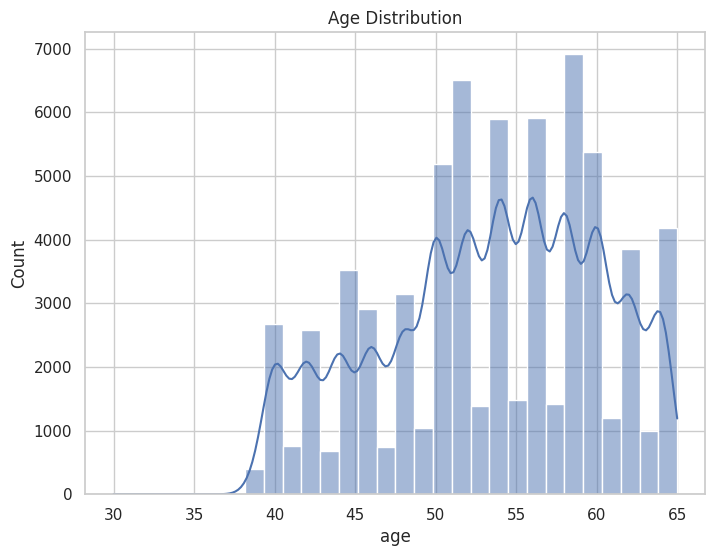

In [ ]:
# Set the style of the visualization
sns.set(style="whitegrid")

# Age distribution
plt.figure(figsize=(8, 6))
sns.histplot(df_clean['age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.show()


Most people in the dataset are above age 40. Number of tests on people over 50 is more.

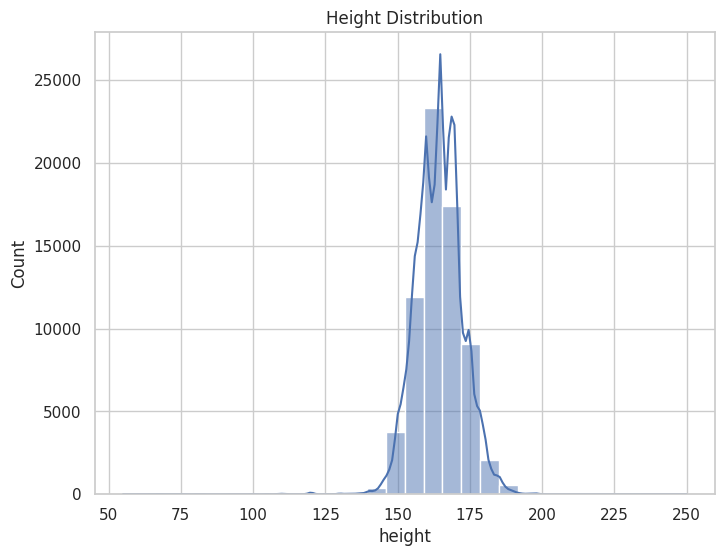

In [ ]:
# Height distribution
plt.figure(figsize=(8, 6))
sns.histplot(df_clean['height'], bins=30, kde=True)
plt.title('Height Distribution')
plt.show()

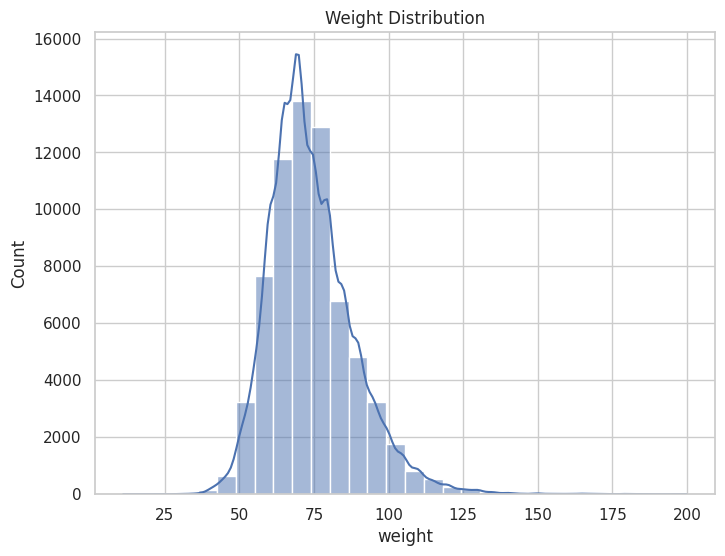

In [ ]:
# Weight distribution
plt.figure(figsize=(8, 6))
sns.histplot(df_clean['weight'], bins=30, kde=True)
plt.title('Weight Distribution')
plt.show()

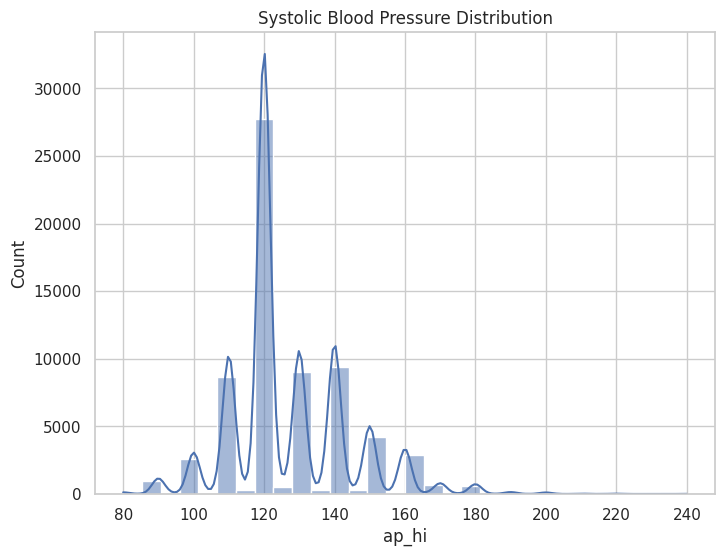

In [ ]:
# Systolic blood pressure distribution
plt.figure(figsize=(8, 6))
sns.histplot(df_clean['ap_hi'], bins=30, kde=True)
plt.title('Systolic Blood Pressure Distribution')
plt.show()

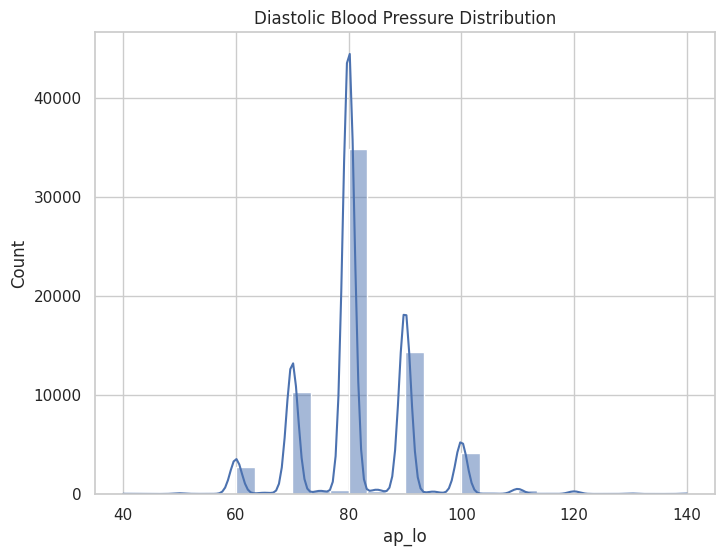

In [ ]:

# Diastolic blood pressure distribution
plt.figure(figsize=(8, 6))
sns.histplot(df_clean['ap_lo'], bins=30, kde=True)
plt.title('Diastolic Blood Pressure Distribution')
plt.show()

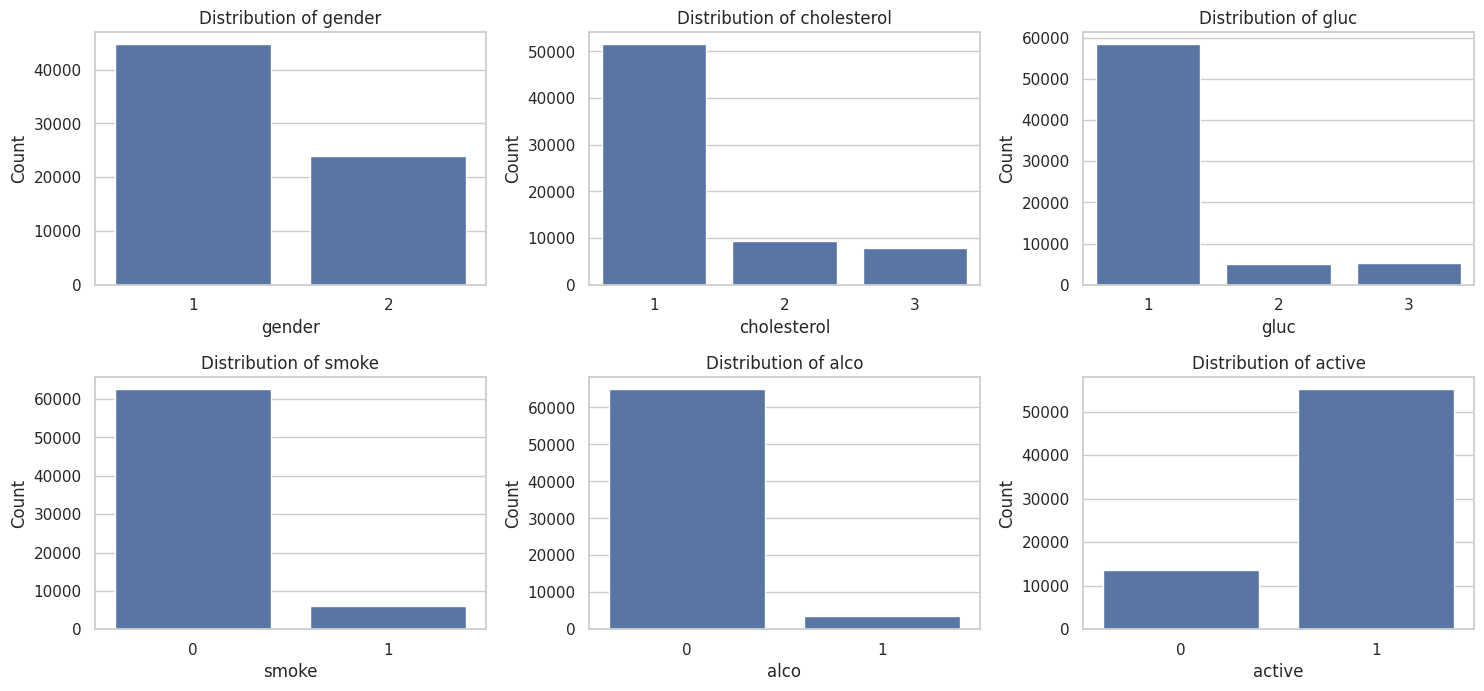

In [ ]:
# List of categorical variables
categorical_vars = ['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active']

# Set the size of the figure
plt.figure(figsize=(15, 10))

# Create a countplot for each categorical variable
for i, var in enumerate(categorical_vars, 1):
    plt.subplot(3, 3, i)
    sns.countplot(x=var, data=df_clean)
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Count')

# Adjust the layout
plt.tight_layout()
plt.show()

Cholesterol = 1: normal, 2: above normal, 3: well above normal
Glucose = 1: normal, 2: above normal, 3: well above normal

Most people have normal cholesterol and glucose.

Alcohol, smoking and activity also affect heart health; their distribution is fairly leaning towards healthy lifestyle in majority people. However these were subjective questions answered by patients at time of exam.

More females have taken tests compared to males.

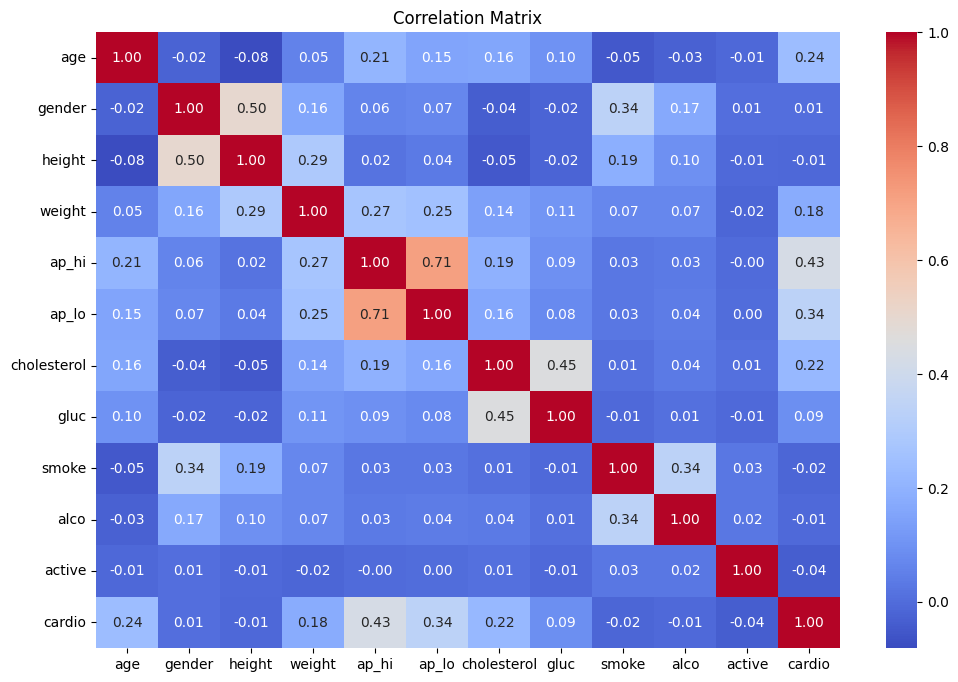

In [ ]:
# Compute the correlation matrix
corr = df_clean.corr()

# Generate a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Correlation Matrix')
plt.show()


High correlation is seen between:

cholesterol levels and blood glucose levels (might be of interest)

systolic bp (ap_hi) and cardiovascular disease (target variable)


Interestingly some features show negative correlation with CVD, such as smoking, alcoholism and activity levels, which is contrary to conventional belief.



<ipython-input-42-49ae48277902>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cardio', y='ap_hi', data=df_clean, palette='coolwarm')


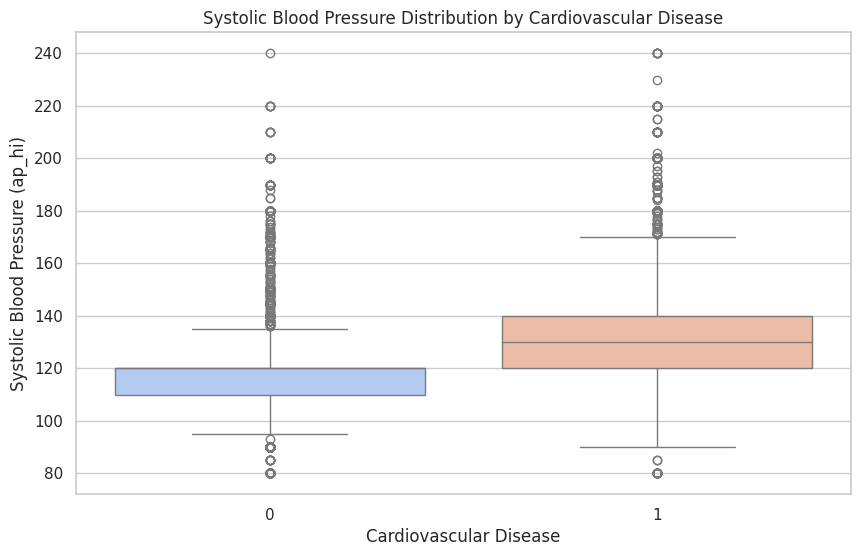

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='cardio', y='ap_hi', data=df_clean, palette='coolwarm')
plt.title('Systolic Blood Pressure Distribution by Cardiovascular Disease')
plt.xlabel('Cardiovascular Disease')
plt.ylabel('Systolic Blood Pressure (ap_hi)')
plt.show()


This data clearly shows how people with cardiovascular disease have on average higher blood pressure (hypertension).

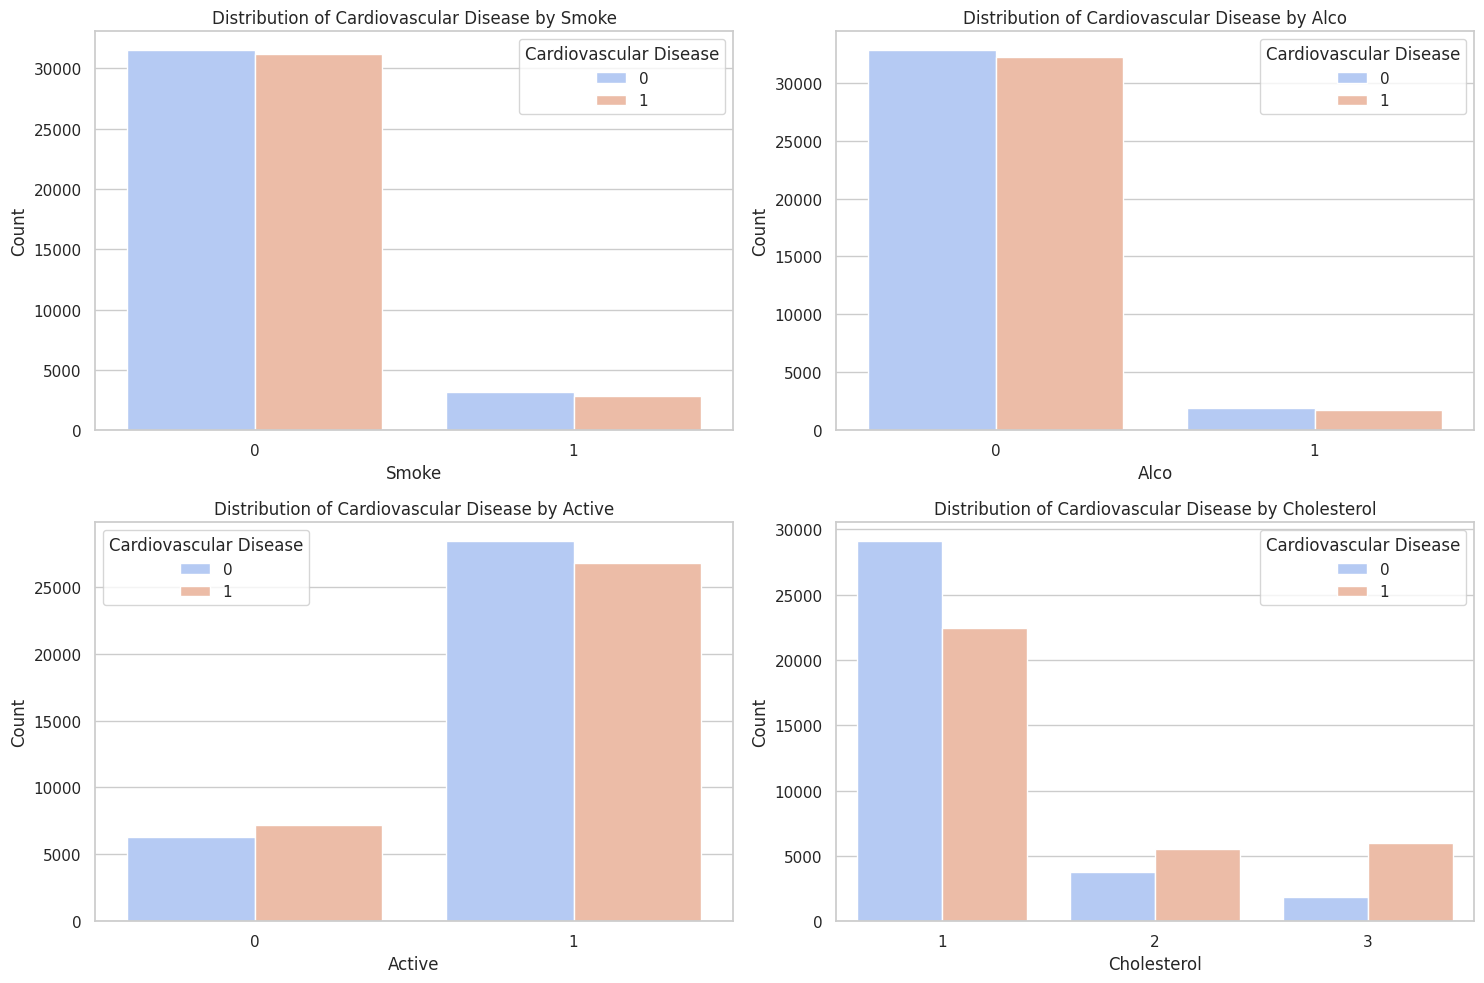

In [ ]:
# List of categorical features
categorical_vars = ['smoke', 'alco', 'active', 'cholesterol']

# Set the size of the figure
plt.figure(figsize=(15, 10))

# Create a bar plot for each categorical feature
for i, var in enumerate(categorical_vars, 1):
    plt.subplot(2, 2, i)
    sns.countplot(x=var, hue='cardio', data=df_clean, palette='coolwarm')
    plt.title(f'Distribution of Cardiovascular Disease by {var.capitalize()}')
    plt.xlabel(var.capitalize())
    plt.ylabel('Count')
    plt.legend(title='Cardiovascular Disease')

# Adjust the layout
plt.tight_layout()
plt.show()


Smoking and alcohol are not showing much difference in distribution between healthy and diseased individuals. Low activity levels result in higher chances of CVD and with increase in activity, chances of CVD decrease. It should also be considered that these are subjective in nature based on patient's response.

When cholesterol is above normal (2 or 3), chances of heart disease are more.

In [ ]:
from sklearn.model_selection import train_test_split

# Features and target variable
X = df_clean.drop('cardio', axis=1)
y = df_clean['cardio']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")


Training set size: 54984
Testing set size: 13746


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Initialize models
log_reg = LogisticRegression(random_state=42)
rf_clf = RandomForestClassifier(random_state=42)

# Train models
log_reg.fit(X_train, y_train)
rf_clf.fit(X_train, y_train)

# Make predictions
y_pred_log_reg = log_reg.predict(X_test)
y_pred_rf_clf = rf_clf.predict(X_test)

# Evaluate models
def evaluate_model(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_pred)

    return {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "ROC AUC": roc_auc
    }

log_reg_metrics = evaluate_model(y_test, y_pred_log_reg)
rf_clf_metrics = evaluate_model(y_test, y_pred_rf_clf)

print("Logistic Regression Metrics:", log_reg_metrics)
print("Random Forest Classifier Metrics:", rf_clf_metrics)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Metrics: {'Accuracy': 0.7119889422377419, 'Precision': 0.7286059629331184, 'Recall': 0.6652442613301942, 'F1 Score': 0.6954849626951772, 'ROC AUC': 0.7114710515284065}
Random Forest Classifier Metrics: {'Accuracy': 0.7002036956205442, 'Precision': 0.6994780014914244, 'Recall': 0.6901118304885226, 'F1 Score': 0.694763350862899, 'ROC AUC': 0.7000918864672829}


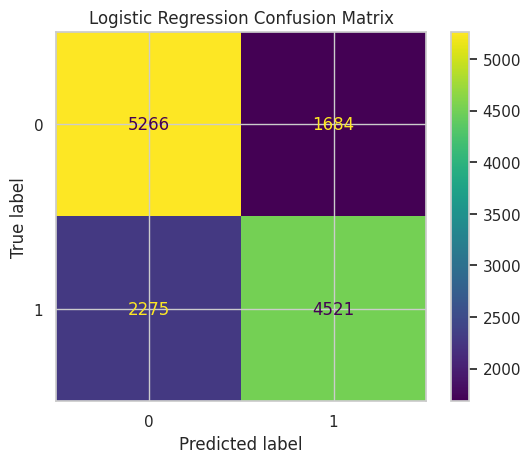

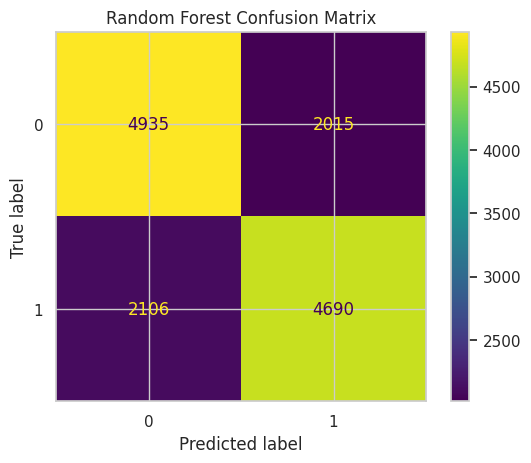

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Confusion Matrix for Logistic Regression
cm_log_reg = confusion_matrix(y_test, y_pred_log_reg)
disp_log_reg = ConfusionMatrixDisplay(confusion_matrix=cm_log_reg)
disp_log_reg.plot()
plt.title("Logistic Regression Confusion Matrix")
plt.show()

# Confusion Matrix for Random Forest
cm_rf_clf = confusion_matrix(y_test, y_pred_rf_clf)
disp_rf_clf = ConfusionMatrixDisplay(confusion_matrix=cm_rf_clf)
disp_rf_clf.plot()
plt.title("Random Forest Confusion Matrix")
plt.show()


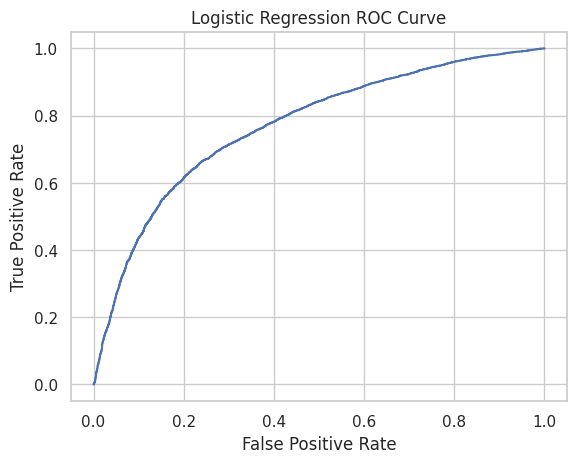

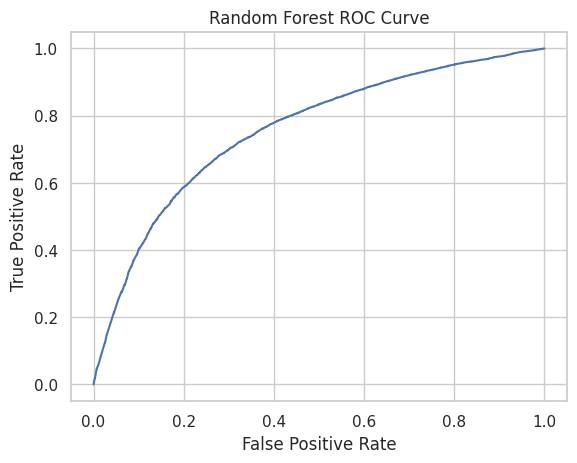

In [ ]:
from sklearn.metrics import roc_curve, RocCurveDisplay

# ROC Curve for Logistic Regression
fpr_log_reg, tpr_log_reg, _ = roc_curve(y_test, log_reg.predict_proba(X_test)[:, 1])
roc_display_log_reg = RocCurveDisplay(fpr=fpr_log_reg, tpr=tpr_log_reg).plot()
plt.title("Logistic Regression ROC Curve")
plt.show()

# ROC Curve for Random Forest
fpr_rf_clf, tpr_rf_clf, _ = roc_curve(y_test, rf_clf.predict_proba(X_test)[:, 1])
roc_display_rf_clf = RocCurveDisplay(fpr=fpr_rf_clf, tpr=tpr_rf_clf).plot()
plt.title("Random Forest ROC Curve")
plt.show()


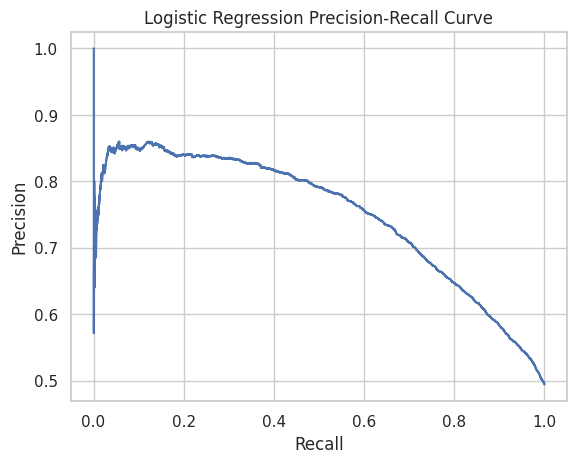

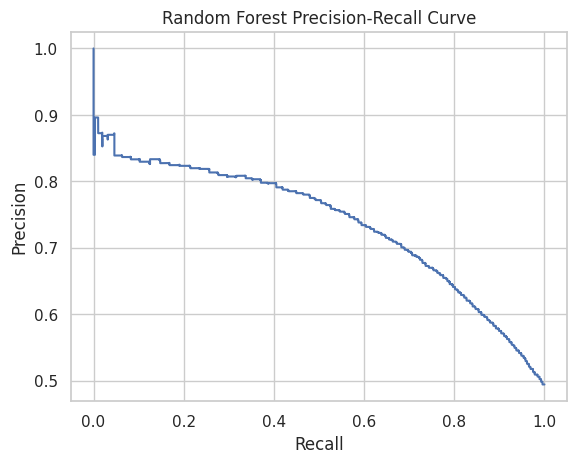

In [ ]:
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay

# Precision-Recall Curve for Logistic Regression
precision_log_reg, recall_log_reg, _ = precision_recall_curve(y_test, log_reg.predict_proba(X_test)[:, 1])
pr_display_log_reg = PrecisionRecallDisplay(precision=precision_log_reg, recall=recall_log_reg).plot()
plt.title("Logistic Regression Precision-Recall Curve")
plt.show()

# Precision-Recall Curve for Random Forest
precision_rf_clf, recall_rf_clf, _ = precision_recall_curve(y_test, rf_clf.predict_proba(X_test)[:, 1])
pr_display_rf_clf = PrecisionRecallDisplay(precision=precision_rf_clf, recall=recall_rf_clf).plot()
plt.title("Random Forest Precision-Recall Curve")
plt.show()
